In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import emd
from statistics import mean
from scipy import signal, ndimage
import math

In [2]:
from scipy import asarray as ar,exp

In [3]:
from scipy.optimize import curve_fit
import matplotlib.patches as ptc
from numpy.polynomial import Polynomial
from astropy.io import fits
from scipy.io import readsav

In [4]:
import scienceplots
plt.style.use(['science','notebook','grid'])

In [5]:
from scipy.stats import sem

In [6]:
import os
entries = os.listdir('Analysis_files')

In [60]:
df1=pd.read_csv('solar_qpps_cho.csv')
df2=pd.read_csv('stellar_cho.csv')
df3=pd.read_csv('abdor.csv')

In [8]:
df1.head()

,Period of QPP detected from IMF in minutes,Damping of the QPP detected from IMF in minutes,Type of CCD/Detector
0,0.495916,0.369020,solar
1,0.392816,0.396005,solar
2,0.357234,0.421232,solar
3,0.342143,0.432529,solar
4,0.368191,0.506968,solar


In [69]:
p1=df1['Period of QPP detected from IMF in minutes']
tau1=df1['Damping of the QPP detected from IMF in minutes']

In [102]:
df2['Period of QPP detected from IMF in minutes']

0      1.689908
1      1.962448
2      2.129204
3      2.386734
4      2.610749
5      2.817234
6      3.015358
7      3.717474
8      5.165413
9      6.031168
10     5.236104
11     7.915260
12     9.092382
13     8.023583
14     7.557782
15     8.334840
16     8.658172
17     8.824511
18    11.148733
19    10.908886
20    12.294998
21    13.932780
22    15.116697
23    21.061761
24    19.785181
25    18.186129
26    18.384965
27    20.330422
28    24.591840
29    30.732883
30    36.772689
31    28.557888
32    34.543848
33    51.935743
34    55.739482
35    65.081757
Name: Period of QPP detected from IMF in minutes, dtype: float64

In [76]:
p2=df2['Period of QPP detected from IMF in minutes']
tau2=df2['Damping of the QPP detected from IMF in minutes']

In [61]:
df3.head()

,Unnamed: 0,period,damping time
0,0,40.13,31.22
1,1,50.01,49.57
2,2,45.52,39.71
3,3,56.70,44.62
4,4,22.94,78.60


In [82]:
p3=df3['period']
tau3=df3['damping time']

[]

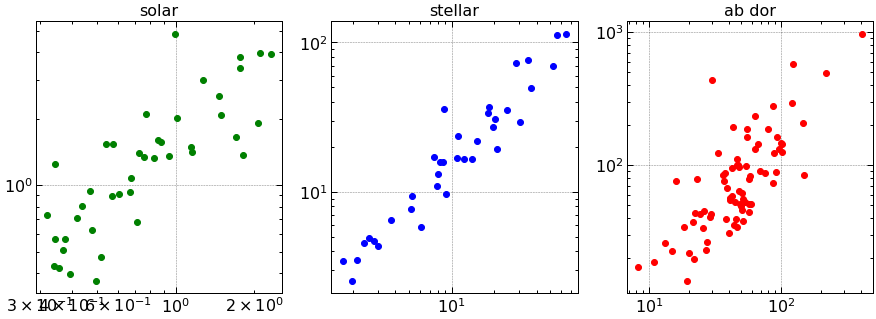

In [101]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(p1,tau1,c='green')
plt.title('solar')
plt.loglog()
plt.subplot(1,3,2)

plt.scatter(p2,tau2,c='blue')
plt.title('stellar')

plt.loglog()
plt.subplot(1,3,3)

plt.scatter(p3,tau3,c='red')
plt.title('ab dor')

plt.loglog()

In [93]:
print('Solar :')
print('mean period :',mean(p1))
print('mean damping time :',mean(tau1))
print('mean tau/P :',mean(tau1/p1))
print('')
print('Stellar :')
print('mean period :',mean(p2))
print('mean damping time :',mean(tau2))
print('mean tau/P :',mean(tau2/p2))
print('')

print('Ab dor :')
print('mean period :',mean(p3))
print('mean damping time :',mean(tau3))
print('mean tau/P :',mean(tau3/p3))

Solar :
mean period : 0.9010737162178631
mean damping time : 1.5332399501221754
mean tau/P : 1.744049444351011

Stellar :
mean period : 16.229861275256194
mean damping time : 27.17966983003616
mean tau/P : 1.6903871872217608

Ab dor :
mean period : 59.25688311688312
mean damping time : 111.66592662337662
mean tau/P : 1.9081463151165423


In [33]:
def scaling(t,c,m):
    return c*(t**m)

In [34]:
popt, pcov = curve_fit(scaling,P, tau)

In [35]:
popt

array([0.94566023, 1.14910728])

[]

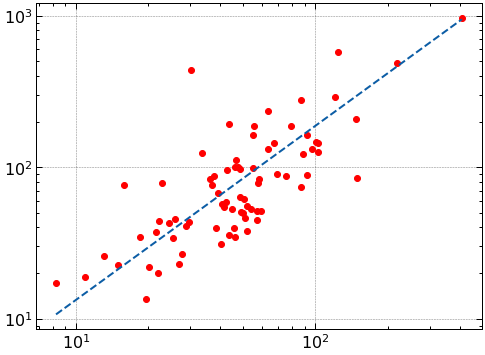

In [67]:
plt.scatter(P,tau,c='red')
plt.plot(np.linspace(min(P),max(P),1000), scaling(np.linspace(min(P),max(P),1000), *popt),'--')

plt.loglog()

In [39]:
slope= (lf[1][1]-lf[1][0])/(lf[0][1]-lf[0][0])

In [40]:
slope

1.6338235120347115

[]

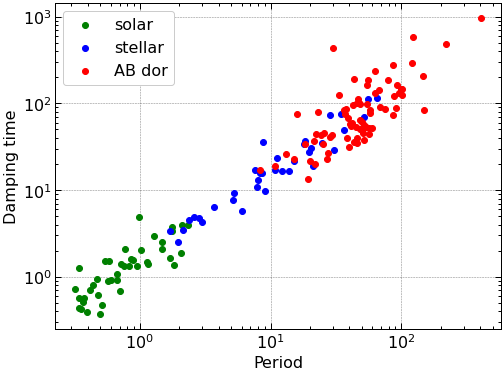

In [68]:
plt.scatter(df1['Period of QPP detected from IMF in minutes'],df1['Damping of the QPP detected from IMF in minutes'],c='green')
plt.scatter(df2['Period of QPP detected from IMF in minutes'],df2['Damping of the QPP detected from IMF in minutes'],c='blue')
plt.scatter(df3['period'],df3['damping time'],c='red')
plt.legend(['solar','stellar','AB dor'])
plt.xlabel('Period')
plt.ylabel('Damping time')
plt.loglog()